### Identificar fronteras no lineales

In [7]:
from sklearn.datasets.samples_generator import make_circles,make_blobs

In [15]:
X,Y = make_circles(n_samples=100, factor = .1, noise=.1)

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

In [17]:
def plt_svc(model,ax = None, plot_support = True):
    """ Plot de la función de decisión para una clasificación en 2D con SVC"""
    if ax == None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    ## Generamos los puntos para evaluar el modelo
    xx = np.linspace(xlim[0],xlim[1],30)
    yy = np.linspace(ylim[0],ylim[1],30)
    Y,X = np.meshgrid(yy,xx)
    
    xy = np.vstack([X.ravel(),Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ## Representamos las fronteras y los márgenes del SVC
    ax.contour(X,Y,P,colors = 'k',levels = [-1,0,1],alpha = 0.5,linestyles=['--','-','--'])
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                   model.support_vectors_[:,1],
                   s = 300, linewidth = 1, facecolors = 'black')
        
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

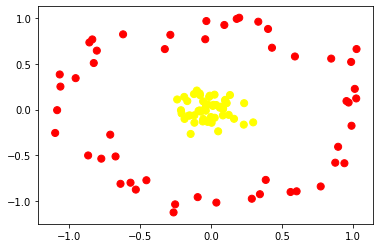

In [18]:
plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap = 'autumn')

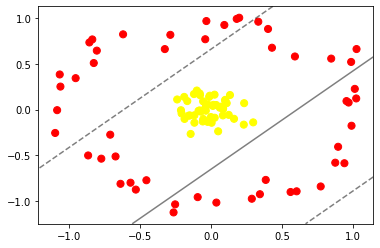

In [20]:
plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap = 'autumn')
plt_svc(SVC(kernel='linear').fit(X,Y),plot_support =False)

In [21]:
r = np.exp(-(X**2).sum(1))

In [23]:
from mpl_toolkits import mplot3d

In [31]:
def plot_3D(evel = 30, azim = 30,X=X,Y=Y,r=r):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:,0],X[:,1],r,c = Y,s = 50,cmap = 'autumn')
    ax.view_init(elev = evel,azim = azim)
    
    ax.set_xlabel('x[0]')
    ax.set_ylabel('x[1]')
    ax.set_zlabel('r')
    

In [32]:
from ipywidgets import interact, fixed

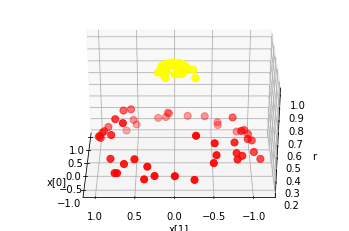

<function __main__.plot_3D(evel=30, azim=30, X=array([[-6.18123045e-01,  8.19480220e-01],
       [-5.42988593e-02, -1.02997576e-01],
       [ 9.99100141e-02,  1.05509908e-01],
       [-7.75353686e-02,  1.57566362e-01],
       [-3.24758478e-01,  6.58864869e-01],
       [-1.43218392e-01, -2.65452549e-01],
       [-7.71176713e-01, -5.34886388e-01],
       [-3.27117647e-02,  9.64197216e-01],
       [-9.37735461e-02, -9.53830784e-01],
       [ 8.73204883e-01, -5.78805119e-01],
       [ 2.86699002e-01, -9.71395130e-01],
       [ 4.28474820e-01,  6.73558179e-01],
       [ 2.58803408e-02, -8.89816845e-02],
       [-2.40438275e-02, -1.33967203e-01],
       [ 9.37573630e-01, -5.84526413e-01],
       [-1.16748187e-01, -6.20500548e-02],
       [-7.08409859e-01, -2.73557290e-01],
       [ 4.26879304e-03, -1.43656222e-01],
       [-5.81360784e-02, -1.29688825e-01],
       [ 9.91385403e-02,  9.85381098e-02],
       [ 6.01614988e-01, -8.90439696e-01],
       [-1.66885252e-01,  9.26369678e-02],
       

In [36]:
interact(plot_3D,elev= [-90,90],azim = [-180,180], X = fixed(X),Y = fixed(Y),r = fixed(r))

In [37]:
rbf = SVC(kernel = 'rbf',C = 1E6)
rbf.fit(X,Y)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

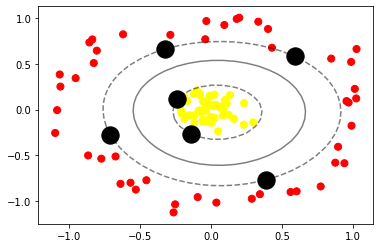

In [39]:
plt.scatter(X[:,0],X[:,1],c=Y,s = 50,cmap = 'autumn')
plt_svc(rbf)
plt.scatter(rbf.support_vectors_[:,0],rbf.support_vectors_[:,1],s=300,lw=1,facecolors ='none')

### Ajustar los párametros de SVM

In [48]:
X,Y = make_blobs(n_samples=100,centers = 2,random_state=0,cluster_std=1.2)

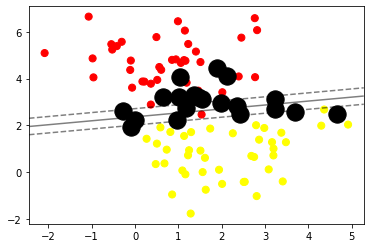

In [49]:
plt.scatter(X[:,0],X[:,1],c=Y,s= 50,cmap = 'autumn')
model = SVC(kernel='linear',C=1E6)
model.fit(X,Y)
plt_svc(model)

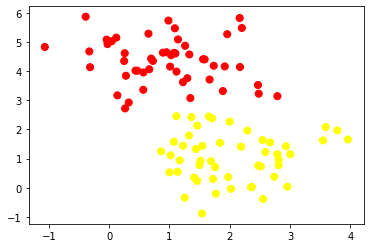

In [42]:
X,Y = make_blobs(n_samples=100,centers = 2, random_state=0,cluster_std=0.8)
plt.scatter(X[:,0],X[:,1],c=Y,s= 50,cmap = 'autumn')

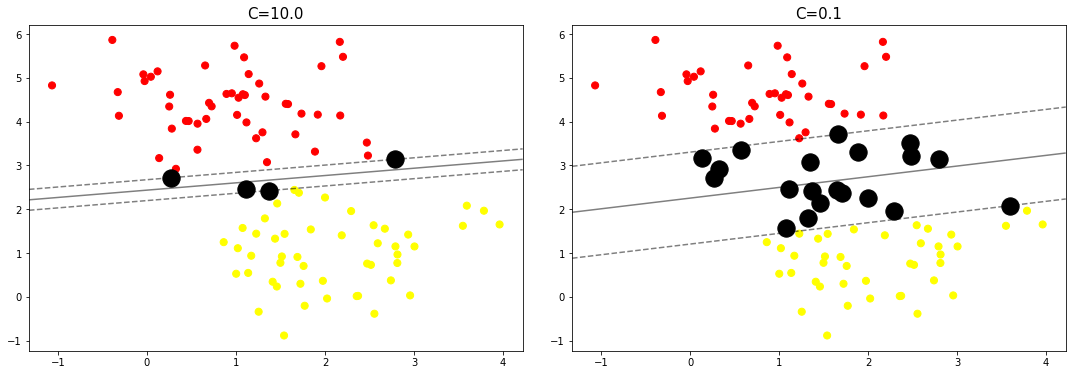

In [46]:
fig,ax = plt.subplots(1,2,figsize=(16,6))
fig.subplots_adjust(left = 0.05,right = 0.95,wspace = 0.1)

for ax_i,C in zip(ax,[10.0,0.1]):
    model = SVC(kernel='linear',C=C)
    model.fit(X,Y)
    ax_i.scatter(X[:,0],X[:,1],c=Y,s=50,cmap='autumn')
    plt_svc(model,ax_i)
    ax_i.set_title("C={0:.1f}".format(C),size = 15) # El C define el ancho del pasillo, debe ser tuenado según los datos